# Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Load data

In [7]:
# Random subsample of train data
df_train = pd.read_csv('data/mnist/mnist_train.csv').sample(frac=0.1)
df_test = pd.read_csv('data/mnist/mnist_test.csv')

In [8]:
df_train.shape

(6000, 785)

In [9]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
55741,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
33417,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54097,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
56440,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3341,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
def plot_image(row):
    plt.imshow(np.reshape(np.array(row.drop('label')), (-1, 28)), cmap='gray')
    plt.title(f'Class = {row["label"]}')
    plt.show()

# EDA

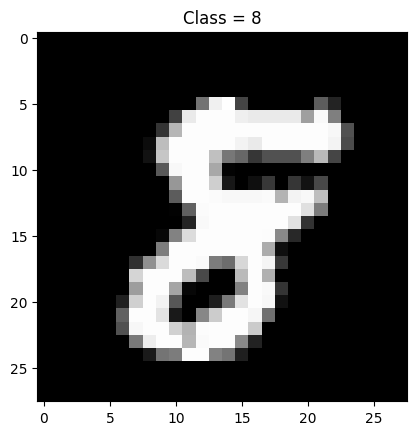

In [11]:
plot_image(df_train.iloc[0])

# Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.metrics import balanced_accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer

In [51]:
# Perform a single train-validation split
ss = ShuffleSplit(n_splits=1, train_size=0.8, test_size=0.2)

In [57]:
# Declare scores to be used
scoring = {
    'Bacc': make_scorer(balanced_accuracy_score),
    'Prec': make_scorer(precision_score, average='micro'),
    'Rec': make_scorer(recall_score, average='micro')
}

In [58]:
dt = DecisionTreeClassifier(max_depth=5)
dt_cv = cross_validate(dt, df_train.drop('label', axis=1), df_train['label'], cv=ss,
                       scoring=scoring, return_train_score=True)

In [61]:
print(dt_cv['train_Bacc'], dt_cv['test_Bacc'])
print(dt_cv['train_Prec'], dt_cv['test_Prec'])
print(dt_cv['train_Rec'], dt_cv['test_Rec'])

[0.68130742] [0.66031454]
[0.68666667] [0.66666667]
[0.68666667] [0.66666667]
